# Classification Challenge

Here, we will use a dataset from the UCI Machine Learning collection describing a Portugese bank marketing campaign.  Our goal is whether or not the individual purchased the promoted contract (the `y` column).  Your task is to do some exploratory eda, any feature engineering you feel relevant, and make sure to encode any categorical variables.  Next, your goal is to use `LogisticRegression` to produce the most appropriate classification model.  Consider whether or not this is a precision, recall, or accuracy oriented task and adjust your classifier to optimize the AUC_ROC score.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/bank_marketing.csv', index_col=0)

In [3]:
df.head()

age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu ...         1    999         0  nonexistent   
1  cellular   nov         fri ...         1    999         0  nonexistent   
2  cellular   jun         thu ...         3      6         2      success   
3  cellular   apr         fri ...         2    999         0  nonexistent   
4  cellular   aug         fri ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          1.4          93.444          -36.1      4.963       5228.1  0  
1         -0.1          93.200          -42.0      4.021       5195.8  0  
2         -1.7          94.055          -39.8      0.729       4991.6  1  
3         -1.8          93.075          -47.1      1.405       5099.1  0  
4         -2.9          92.201          -31.4      0.869       5076.2  1  

[5 rows x 21 columns]

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.pipeline import make_pipeline

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [15]:
df_target = df['y']


In [25]:
df.groupby(['education']).size()

education
basic.4y                4176
basic.6y                2292
basic.9y                6045
high.school             9515
illiterate                18
professional.course     5243
university.degree      12168
unknown                 1731
dtype: int64

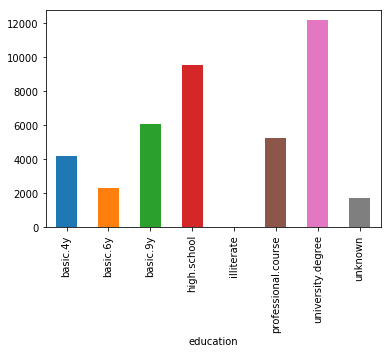

In [26]:
df.groupby(['education']).size().plot(kind='bar')

In [54]:
print(df.age.median())
print(df.age.mean())

38.0
40.02406040594348


In [37]:
df.groupby(['marital']).size()

marital
divorced     4612
married     24928
single      11568
unknown        80
dtype: int64

In [42]:
df.groupby('marital').median()

age  duration  campaign  pdays  previous  emp_var_rate  \
marital                                                             
divorced  44.0     179.5       2.0  999.0       0.0           1.1   
married   41.0     179.0       2.0  999.0       0.0           1.1   
single    32.0     182.0       2.0  999.0       0.0           1.1   
unknown   35.5     210.0       2.0  999.0       0.0           0.5   

          cons_price_idx  cons_conf_idx  euribor3m  nr_employed    y  
marital                                                               
divorced          93.918          -42.0     4.8570       5195.8  0.0  
married           93.918          -41.8     4.8570       5191.0  0.0  
single            93.444          -42.0     4.8550       5191.0  0.0  
unknown           93.444          -41.8     4.4875       5191.0  0.0

In [47]:
df.groupby(['day_of_week','poutcome']).size().unstack() 

poutcome     failure  nonexistent  success
day_of_week                               
fri              903         6703      221
mon              873         7364      277
thu              867         7442      314
tue              805         6994      291
wed              804         7060      270

In [93]:
df.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [99]:
df.groupby(['poutcome']).median()

age  duration  campaign  pdays  previous  emp_var_rate  \
poutcome                                                              
failure       37       180         1    999         1          -1.8   
nonexistent   38       177         2    999         0           1.1   
success       37       254         1      5         1          -1.8   

             cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
poutcome                                                               
failure              92.893          -46.2      1.299       5099.1  0  
nonexistent          93.918          -41.8      4.859       5195.8  0  
success              93.075          -38.3      0.879       5017.5  1

In [65]:
df_num = df.select_dtypes(include = 'int64')
df_num.head()

age  duration  campaign  pdays  previous  y
0   44       210         1    999         0  0
1   53       138         1    999         0  0
2   28       339         3      6         2  1
3   39       185         2    999         0  0
4   55       137         1      3         1  1

In [59]:
std_df = std_scaled.fit_transform(df[[name for name in df_num]])

In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_scaled = StandardScaler()
minmax_scaled = MinMaxScaler()

In [66]:

pd.DataFrame(std_df, columns=['age','duraction','campaign','pdays','previous','y']).head()

age  duraction  campaign     pdays  previous         y
0  0.381527  -0.186230 -0.565922  0.195414 -0.349494 -0.356309
1  1.245157  -0.463926 -0.565922  0.195414 -0.349494 -0.356309
2 -1.153816   0.311309  0.156105 -5.117342  3.691766  2.806550
3 -0.098268  -0.282652 -0.204909  0.195414 -0.349494 -0.356309
4  1.437075  -0.467783 -0.565922 -5.133393  1.671136  2.806550

In [68]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [71]:

y = df['y']

In [75]:
lr.fit(std_df, y)
pred = lr.predict(std_df)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(pred,y)
rmse = np.sqrt(mse)

In [76]:
rmse

4.331303988470607e-16

In [85]:
X = df[['age', 'pdays']]
X_train, X_test, y_train, y_test = train_test_split(X, df.y)
clf = LogisticRegression()

In [86]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
pred = clf.predict(X_test)
print(classification_report(pred, y_test))

#Not precise at all. Terrible model

             precision    recall  f1-score   support

          0       0.98      0.91      0.94      9918
          1       0.21      0.64      0.31       379

avg / total       0.96      0.90      0.92     10297

